<a href="https://colab.research.google.com/github/maksim267/Game_of_Thrones_Character_Survival_Prediction.ipynb/blob/main/%D0%98%D0%B3%D1%80%D0%B0_%D0%BF%D1%80%D0%B5%D1%81%D1%82%D0%BE%D0%BB%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>


Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

# Часть 1. Анализ и предобработка данных

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 24.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 51.6MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


## Предобработка (очистка) данных.


In [ ]:
data.dtypes

,0
name,object
title,object
male,int64
culture,object
dateOfBirth,float64
mother,object
father,object
heir,object
house,object
spouse,object


In [ ]:
data.isna().sum(axis=0)

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [ ]:
data.isna().sum(axis=0)

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [ ]:
data.title=data.title.fillna(data['title'].mode()[0])#заменяю пропущенные значения title само часто встречающимся значением
data.house=data.house.fillna('Homeless')#заменяю пропущенные значения house новым значением "Homeless"
data.culture=data.culture.fillna('without')#заменяю пропущенные значения culture новым значением "without"
data.age=data.age.fillna(data['age'].median())#заменяю пропущенные значения age медианой
data.dateOfBirth=data.dateOfBirth.fillna(data['dateOfBirth'].median())#заменяю пропущенные значения dateOfBirth медианой
# data[['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']]=data[['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']].fillna(0.5)
data[data.columns[data.isnull().sum()>(data.shape[0]*0.7)]]=data[data.columns[data.isnull().sum()>(data.shape[0]*0.7)]].fillna('unknown')

In [ ]:
data.mother.value_counts()

,count
mother,
unknown,1539
Rhaenyra Targaryen,2
Cersei Lannister,2
Mariah Martell,1
Betha Blackwood,1
Lady of House Sunderly,1
Naerys Targaryen,1
Daenaera Velaryon,1
Shaera Targaryen,1


In [ ]:
data.father.value_counts()

,count
father,
unknown,1535
Daemon Targaryen,2
Robert Baratheon,2
Aegon I Targaryen,2
Brandon Stark,1
Aenys I Targaryen,1
Aegon V Targaryen,1
Qhorwyn Hoare,1
Quellon Greyjoy,1


## Создание новых признаков



In [ ]:
data.loc[data['popularity'] > 0.5, 'isPopular'] = 1
data.loc[data['popularity'] < 0.5, 'isPopular'] = 0
data= data.drop('popularity', axis=1)
data.loc[data['numDeadRelations']>0,'numDeadRelations']=1



In [ ]:
# name_to_house = dict(zip(data['name'], data['house']))#пробовал заменять имена родителей на дома к которым они принадлежат
# data['ParentsHouse'] = data['father'].map(name_to_house)
# data.ParentsHouse=data.ParentsHouse.fillna('unknown')
#data.ParentsHouse.value_counts()
data.loc[data['father']!='unknown','FamousParents']=1
data.loc[data['father']=='unknown','FamousParents']=0
data=data.drop(['mother', 'father'],axis=1)
data.FamousParents.value_counts()

# name_to_house = dict(zip(data['name'], data['house']))
# data['SpousesHouse'] = data['spouse'].map(name_to_house)#пробовал заменять имена супругов  на дома к которым они принадлежат
# data.SpousesHouse=data.SpousesHouse.fillna('unknown')
# data.SpousesHouse.value_counts()
data.loc[data['spouse']!='unknown','FamousSpouse']=1
data.loc[data['spouse']=='unknown','FamousSpouse']=0
data=data.drop('spouse',axis=1)
data.FamousSpouse.value_counts()

,count
FamousSpouse,
0.0,1357
1.0,200


In [ ]:
data['NumAppBook']=(data.book1+data.book2+data.book3+data.book4+data.book5)/5
data.drop(['book1','book2','book3','book4','book5'], axis=1)

,name,title,male,culture,dateOfBirth,heir,house,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,isAlive,isPopular,FamousParents,FamousSpouse,NumAppBook
S.No,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,without,272.0,Aegon IV Targaryen,Homeless,1.0,0.0,0.0,unknown,0,0,24.0,1,0,1.0,1.0,0.0,0.0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,unknown,House Frey,unknown,unknown,unknown,1.0,1,1,97.0,1,1,1.0,0.0,1.0,1.0
3,Addison Hill,Ser,1,without,272.0,unknown,House Swyft,unknown,unknown,unknown,unknown,0,1,24.0,0,1,0.0,0.0,0.0,0.2
4,Aemma Arryn,Queen,0,without,82.0,unknown,House Arryn,unknown,unknown,unknown,0.0,1,1,23.0,0,0,0.0,0.0,1.0,0.0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,unknown,House Santagar,unknown,unknown,unknown,1.0,1,1,29.0,0,1,0.0,0.0,1.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,without,272.0,unknown,Homeless,unknown,unknown,unknown,unknown,0,1,24.0,0,1,0.0,0.0,0.0,0.6
1554,Masha Heddle,Ser,0,without,272.0,unknown,Homeless,unknown,unknown,unknown,unknown,0,0,24.0,0,0,0.0,0.0,0.0,0.4
1555,Matthos Seaworth,Ser,1,without,272.0,unknown,House Seaworth,unknown,unknown,unknown,unknown,0,0,24.0,0,0,0.0,0.0,0.0,0.8


In [ ]:
data

,name,title,male,culture,dateOfBirth,heir,house,book1,book2,book3,...,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,isAlive,isPopular,FamousParents,FamousSpouse,NumAppBook
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,without,272.0,Aegon IV Targaryen,Homeless,0,0,0,...,unknown,0,0,24.0,1,0,1.0,1.0,0.0,0.0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,unknown,House Frey,1,1,1,...,1.0,1,1,97.0,1,1,1.0,0.0,1.0,1.0
3,Addison Hill,Ser,1,without,272.0,unknown,House Swyft,0,0,0,...,unknown,0,1,24.0,0,1,0.0,0.0,0.0,0.2
4,Aemma Arryn,Queen,0,without,82.0,unknown,House Arryn,0,0,0,...,0.0,1,1,23.0,0,0,0.0,0.0,1.0,0.0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,unknown,House Santagar,0,0,0,...,1.0,1,1,29.0,0,1,0.0,0.0,1.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,without,272.0,unknown,Homeless,1,0,1,...,unknown,0,1,24.0,0,1,0.0,0.0,0.0,0.6
1554,Masha Heddle,Ser,0,without,272.0,unknown,Homeless,1,1,0,...,unknown,0,0,24.0,0,0,0.0,0.0,0.0,0.4
1555,Matthos Seaworth,Ser,1,without,272.0,unknown,House Seaworth,0,1,1,...,unknown,0,0,24.0,0,0,0.0,0.0,0.0,0.8


In [ ]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
cult_modern=dict()
for k, v in cult.items():
  for i in v:
    cult_modern[i]=k
data.culture = data.culture.replace(cult_modern)

In [ ]:
data['culture'].value_counts()


,count
culture,
without,1069
Northmen,103
Ironborn,91
Free Folk,46
Braavosi,39
Valyrian,28
Ghiscari,17
Dornish,17
Dothraki,17


## Анализ влияния признаков на целевую переменную

In [ ]:
data

,name,title,male,culture,dateOfBirth,heir,house,book1,book2,book3,...,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,isAlive,isPopular,FamousParents,FamousSpouse,NumAppBook
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,without,272.0,Aegon IV Targaryen,Homeless,0,0,0,...,unknown,0,0,24.0,1,0,1.0,1.0,0.0,0.0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,unknown,House Frey,1,1,1,...,1.0,1,1,97.0,1,1,1.0,0.0,1.0,1.0
3,Addison Hill,Ser,1,without,272.0,unknown,House Swyft,0,0,0,...,unknown,0,1,24.0,0,1,0.0,0.0,0.0,0.2
4,Aemma Arryn,Queen,0,without,82.0,unknown,House Arryn,0,0,0,...,0.0,1,1,23.0,0,0,0.0,0.0,1.0,0.0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,unknown,House Santagar,0,0,0,...,1.0,1,1,29.0,0,1,0.0,0.0,1.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,without,272.0,unknown,Homeless,1,0,1,...,unknown,0,1,24.0,0,1,0.0,0.0,0.0,0.6
1554,Masha Heddle,Ser,0,without,272.0,unknown,Homeless,1,1,0,...,unknown,0,0,24.0,0,0,0.0,0.0,0.0,0.4
1555,Matthos Seaworth,Ser,1,without,272.0,unknown,House Seaworth,0,1,1,...,unknown,0,0,24.0,0,0,0.0,0.0,0.0,0.8


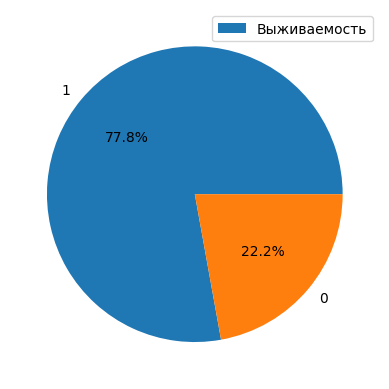

In [ ]:
info = data['isAlive'].value_counts()

plt.pie(info.values, labels=info.index, autopct='%1.1f%%')

plt.legend(['Выживаемость'])

plt.show()

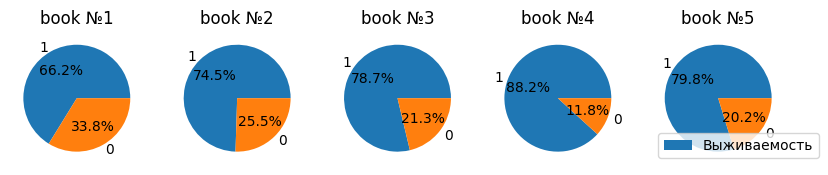

In [ ]:
#проверка зависимости выживаемости от появления в книгах
book1 = data[data['book1'] == 1]['isAlive'].value_counts()
book2 = data[data['book2'] == 1]['isAlive'].value_counts()
book3 = data[data['book3'] == 1]['isAlive'].value_counts()
book4 = data[data['book4'] == 1]['isAlive'].value_counts()
book5 = data[data['book5'] == 1]['isAlive'].value_counts()
# Строим круговую диаграмму
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(10,8))

ax1.pie(book1.values, labels=book1.index, autopct='%1.1f%%')
ax2.pie(book2.values, labels=book2.index, autopct='%1.1f%%')
ax3.pie(book3.values, labels=book3.index, autopct='%1.1f%%')
ax4.pie(book4.values, labels=book4.index, autopct='%1.1f%%')
ax5.pie(book5.values, labels=book5.index, autopct='%1.1f%%')
ax1.set_title("book №1")
ax2.set_title("book №2")
ax3.set_title("book №3")
ax4.set_title("book №4")
ax5.set_title("book №5")

plt.legend(['Выживаемость'])

plt.show()

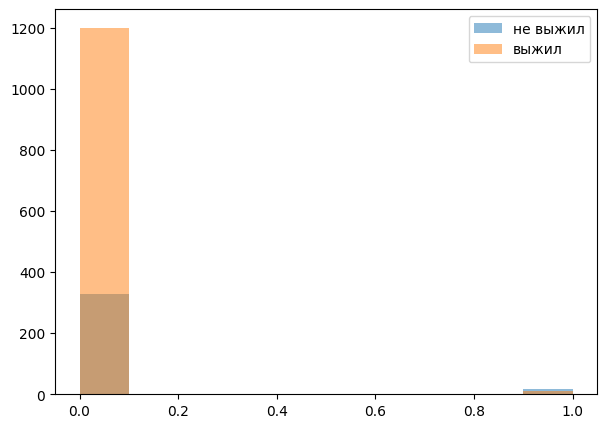

In [ ]:
#проверка влияния популярности на выживание
plt.figure(figsize=(7, 5))

plt.hist(data['isPopular'][data['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(data['isPopular'][data['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

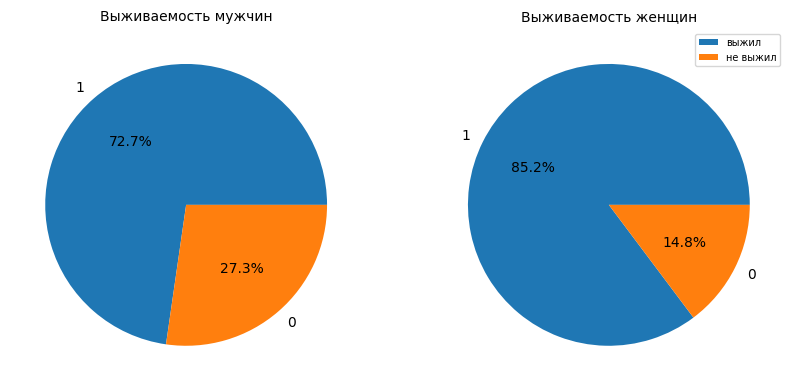

In [ ]:
data_1 = data[data['male']== 1]['isAlive'].value_counts()
data_2 = data[data['male']== 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Выживаемость мужчин', fontsize=10)
ax2.set_title('Выживаемость женщин', fontsize=10)

plt.legend(['выжил','не выжил'], fontsize=7)

plt.show()

In [ ]:
# for i in data.title.unique():#пришлось закоментировать чтобы влесть в ограничение по размеру исходного файла
#   info=data[data['title']==i]['isAlive'].value_counts()
#   plt.pie(info.values, labels=info.index, autopct='%1.1f%%')
#   plt.title(i)
#   plt.show()

In [ ]:
# for i in data.house.unique():#пришлось закоментировать чтобы влесть в ограничение по размеру исходного файла
#   info=data[data['house']==i]['isAlive'].value_counts()
#   plt.pie(info.values, labels=info.index, autopct='%1.1f%%')
#   plt.title(i)
#   plt.show()

In [ ]:
data=data.drop(['name','heir','isAliveSpouse',	'isMarried',	'isNoble','isAliveFather','isAliveMother','isAliveHeir'],axis=1)

In [ ]:
data.dtypes

,0
title,object
male,int64
culture,object
dateOfBirth,float64
house,object
book1,int64
book2,int64
book3,int64
book4,int64
book5,int64


In [ ]:
data.isAlive.value_counts()#целевая переменная категориального типа, задача бинарной класификации
#Так как количество выжевших персонажей мира Вестерос значительно больше чем умерших то датасет является несбалансированным

,count
isAlive,
1,1212
0,345


## Перевод категориальных признаков в числовые

In [ ]:
data

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,age,numDeadRelations,isAlive,isPopular,FamousParents,FamousSpouse,NumAppBook
S.No,,,,,,,,,,,,,,,,,
1,Ser,1,without,272.0,Homeless,0,0,0,0,0,24.0,1,0,1.0,1.0,0.0,0.0
2,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,1,97.0,1,1,1.0,0.0,1.0,1.0
3,Ser,1,without,272.0,House Swyft,0,0,0,1,0,24.0,0,1,0.0,0.0,0.0,0.2
4,Queen,0,without,82.0,House Arryn,0,0,0,0,0,23.0,0,0,0.0,0.0,1.0,0.0
5,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,0,29.0,0,1,0.0,0.0,1.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,without,272.0,Homeless,1,0,1,1,0,24.0,0,1,0.0,0.0,0.0,0.6
1554,Ser,0,without,272.0,Homeless,1,1,0,0,0,24.0,0,0,0.0,0.0,0.0,0.4
1555,Ser,1,without,272.0,House Seaworth,0,1,1,1,1,24.0,0,0,0.0,0.0,0.0,0.8


In [ ]:
data.dtypes

,0
title,object
male,int64
culture,object
dateOfBirth,float64
house,object
book1,int64
book2,int64
book3,int64
book4,int64
book5,int64


In [ ]:
real_columns = data.columns[data.dtypes=='int64']# выделение вещественных признаков
real_data = data[real_columns]

cat_columns=data.columns[data.dtypes=='object']# выделение категориальных признаков
cat_data = data[cat_columns]
cat_data
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
one_hot_data = encoder.fit(cat_data)
one_hot_data = pd.DataFrame(one_hot_data.transform(cat_data), index=cat_data.index, columns=encoder.get_feature_names_out())

In [ ]:
one_hot_data

,title_Acorn Hall,title_Archmaester,title_Ashford,title_Banefort,title_Big BucketThe Wull,title_Bitterbridge,title_Blackcrown,title_Blackmont,title_Bloodrider,title_Blue Grace,...,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
real_data

,male,book1,book2,book3,book4,book5,numDeadRelations,isAlive
S.No,,,,,,,,
1,1,0,0,0,0,0,1,0
2,1,1,1,1,1,1,1,1
3,1,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0,1
1554,0,1,1,0,0,0,0,0
1555,1,0,1,1,1,1,0,0


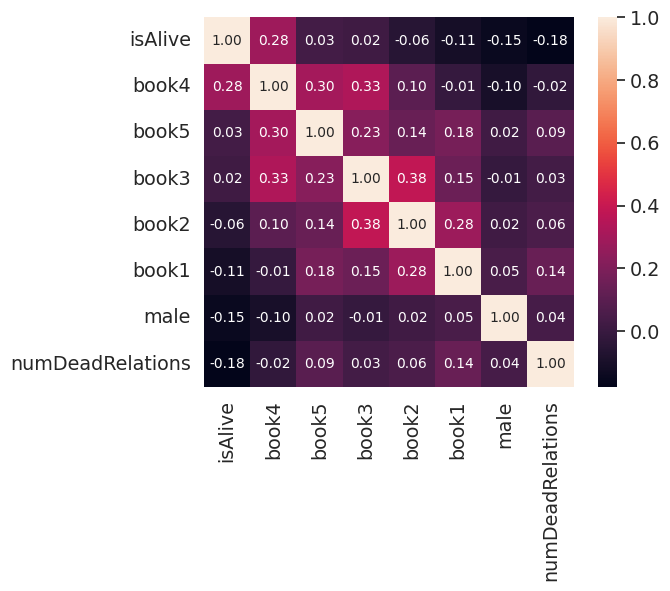

In [ ]:
# correlation matrix
import numpy as np
corrmat = real_data.corr()
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(real_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#по итогам корреляции можно заметить что большая часть признакав не зависят друг от друга
#минимальной зависимостью обладают принаки появления персонажей в книгах но корреляция между ними не существенны

# Часть 2. Обучение моделей

In [ ]:
x=pd.concat([real_data, one_hot_data], axis='columns').drop('isAlive',axis=1)
y=data['isAlive']
x

,male,book1,book2,book3,book4,book5,numDeadRelations,title_Acorn Hall,title_Archmaester,title_Ashford,...,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,1,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,1,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,1,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,0,1,1,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,1,0,1,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# #исправляем несбалансированность классов
# from imblearn.over_sampling import SMOTE
# smot = SMOTE(
#     sampling_strategy='auto',
#     random_state=None,
#     k_neighbors=5,
# )
# x, y = smot.fit_resample(x, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
modelLR = LogisticRegression(C=1,n_jobs=-1)

# Шаг 2. обучение модели
from sklearn.model_selection import GridSearchCV
paramsLR={
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
    'class_weight': ['dict', 'balanced',None]
}
searchLR = GridSearchCV(modelLR, param_grid= paramsLR,cv=5, scoring='accuracy', n_jobs=-1)
searchLR.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

GridSearchCV(cv=5, estimator=LogisticRegression(C=1, n_jobs=-1), n_jobs=-1,
             param_grid={'class_weight': ['dict', 'balanced', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky']},
             scoring='accuracy')

In [ ]:

paramsRFC = {
            'n_estimators': [70, 100,150, 200],
           'max_depth': np.arange(1, 10),
           'criterion': ['gini', 'entropy', 'log_loss'],
            'min_samples_split': np.arange(0,3),}
modelRFC=RandomForestClassifier()
searchRFC = GridSearchCV(modelRFC, paramsRFC, cv=5, scoring='accuracy', n_jobs=-1)
searchRFC.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ut

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([0, 1, 2]),
                         'n_estimators': [70, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
modelKNN =KNeighborsClassifier()
paramsKNN = {
    'n_neighbors': np.arange(1, 10),
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean'],
}

searchKNN = GridSearchCV(modelKNN, paramsKNN, cv=5, scoring='accuracy', n_jobs=-1)
searchKNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
modelDTC = DecisionTreeClassifier(criterion='entropy')
paramsDTC = {
    'min_samples_split': np.arange(1, 3),
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['best', 'random'],
}
searchDTC = GridSearchCV(modelDTC, paramsDTC, cv=5, scoring='accuracy', n_jobs=-1)
searchDTC.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': array([1, 2]),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
modelABC= AdaBoostClassifier()
# paramsABC = {
#     'n_estimators': [125,150, 175],
#     'random_state': np.arange(1, 3)
# }
# searchABC = GridSearchCV(modelABC, paramsABC, cv=5, scoring='accuracy', n_jobs=-1)
# searchABC.fit(X_train, y_train)
modelABC.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool, cv# импортирование библиотеки для Градиентного бустинга от Яндекса
train_dataset = Pool(data=X_train,#создание промежуточного класса для градиентного бустинга
                     label=y_train)

modelCBC = CatBoostClassifier(iterations=500,depth =8, loss_function='Logloss',verbose=False)# обучение градиентного бустинга
modelCBC.fit(train_dataset)

# Часть 3. Оценка качества моделей

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Шаг 3. Предсказание на тестовых данных модель линейная регрессия
y_predLR = searchLR.best_estimator_.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracyLR = accuracy_score(y_test, y_predLR)
print("Accuracy : %.4f" % accuracyLR)

Accuracy : 0.7714


In [ ]:
y_predRFC = searchRFC.best_estimator_.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracyRFC = accuracy_score(y_test, y_predRFC)

print("Accuracy : %.4f" % accuracyRFC)

Accuracy : 0.7607


In [ ]:
y_predKNN = searchKNN.best_estimator_.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracyKNN = accuracy_score(y_test, y_predKNN)

print("Accuracy : %.4f" % accuracyRFC)

Accuracy : 0.7607


In [ ]:
y_predDTC = searchDTC.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracyDTC = accuracy_score(y_test, y_predDTC)

print("Accuracy : %.4f" % accuracyDTC)

Accuracy : 0.7350


In [ ]:
y_predABC = modelABC.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracyABC = accuracy_score(y_test, y_predABC)

print("Accuracy : %.4f" % accuracyABC)

Accuracy : 0.7778


In [ ]:
y_predCBC = modelCBC.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracyABC = accuracy_score(y_test, y_predCBC)

print("Accuracy : %.4f" % accuracyABC)

Accuracy : 0.7671


Выберите лучшую модель.

In [ ]:
test_dataset = Pool(data=x,
                     label=y)
modelCBC = CatBoostClassifier(iterations=500,depth =8, loss_function='Logloss',verbose=False)
modelCBC.fit(test_dataset)

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.28MB/s]


In [ ]:
data_test= pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')
data_test.title=data_test.title.fillna(data_test['title'].mode()[0])
data_test.house=data_test.house.fillna('Homeless')
data_test.culture=data_test.culture.fillna('without')#data_test['culture'].mode()[0])
data_test.age=data_test.age.fillna(data_test['age'].median())
data_test.dateOfBirth=data_test.dateOfBirth.fillna(data_test['dateOfBirth'].median())
data_test[['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']]=data_test[['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']].fillna(0.5)
data_test[data_test.columns[data_test.isnull().sum()>(data_test.shape[0]*0.7)]]=data_test[data_test.columns[data_test.isnull().sum()>(data_test.shape[0]*0.7)]].fillna('unknown')

data_test.loc[data_test['popularity'] > 0.5, 'isPopular'] = 1
data_test.loc[data_test['popularity'] < 0.5, 'isPopular'] = 0
data_test= data_test.drop('popularity', axis=1)
data_test.loc[data_test['numDeadRelations']>0,'numDeadRelations']=1

cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
# name_to_house = dict(zip(data_test['name'], data_test['house']))
# data_test['ParentsHouse'] = data_test['father'].map(name_to_house)
# data_test.ParentsHouse=data_test.ParentsHouse.fillna('unknown')
#data.ParentsHouse.value_counts()
data_test.loc[data_test['father']!='unknown','FamousParents']=1
data_test.loc[data_test['father']=='unknown','FamousParents']=0
data_test=data_test.drop(['mother', 'father'],axis=1)

# name_to_house = dict(zip(data_test['name'], data_test['house']))
# data_test['SpousesHouse'] = data_test['spouse'].map(name_to_house)
# data_test.SpousesHouse=data_test.SpousesHouse.fillna('unknown')
# data_test.SpousesHouse.value_counts()
data_test.loc[data_test['spouse']!='unknown','FamousSpouse']=1
data_test.loc[data_test['spouse']=='unknown','FamousSpouse']=0
data_test=data_test.drop('spouse',axis=1)
data_test['NumAppBook']=(data_test.book1+data_test.book2+data_test.book3+data_test.book4+data_test.book5)/5
data_test.drop(['book1','book2','book3','book4','book5'], axis=1)
cult_modern=dict()
for k, v in cult.items():
  for i in v:
    cult_modern[i]=k
data_test.culture = data_test.culture.replace(cult_modern)

data_test=data_test.drop(['name','heir','isAliveSpouse',	'isMarried',	'isNoble','isAliveFather','isAliveMother','isAliveHeir'],axis=1)

real_columns = data_test.columns[data_test.dtypes=='int64']# выделение вещественных признаков
real_data2 = data_test[real_columns]

cat_columns=data_test.columns[data_test.dtypes=='object']# выделение категориальных признаков
cat_data2 = data_test[cat_columns]

encoder = OneHotEncoder(categories='auto',sparse_output=False, handle_unknown = 'ignore')
one_hot_data2 = encoder.fit(cat_data)
one_hot_data2 = pd.DataFrame(one_hot_data2.transform(cat_data2), index=cat_data2.index, columns=encoder.get_feature_names_out())

x_out=pd.concat([real_data2, one_hot_data2], axis='columns')



In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
x_out

,male,book1,book2,book3,book4,book5,numDeadRelations,title_Acorn Hall,title_Archmaester,title_Ashford,...,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,0,0,0,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1559,0,0,1,1,1,1,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,0,0,0,1,1,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1561,1,1,1,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1562,1,1,1,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,1,1,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,1,0,1,0,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1944,1,1,1,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
submission['isAlive'] =modelCBC.predict(x_out)

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)